<a href="https://colab.research.google.com/github/Greekmy/python/blob/main/H3patternAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as text
```

#Uber H3 for product sale/weather forecast with Python

#Goal: Use H3 geo-spatial index system to predcit seasonal change in weather patterns 

```
# This is formatted as text
```

#A uniform grid framework to view geospatial data and derive insights from it. 

# Advantage: 
1. The Hexagonal shape that covers the earth uniformly
2. The Hexagons have constant distance between a hexagon’s center-point and its neighbors’
3. Hexagon's shape and size can be altered to cover the entire shape of the region
4. Grid based analysis of the data that represents the physical quantities






In [10]:
!pip install h3pandas
import pandas as pd
import matplotlib.pyplot as plt
import h3pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 1.0 MB 40.5 MB/s 
     |████████████████████████████████| 6.3 MB 50.7 MB/s 
     |████████████████████████████████| 16.7 MB 65.7 MB/s 
  Created wheel for h3pandas: filename=h3pandas-0.2.3-py3-none-any.whl size=17136 sha256=247a27cca045815ce94525efd6534a419fedd442483f9a7aceec491c6499ca9d
  Stored in directory: /root/.cache/pip/wheels/59/d8/b5/d5406a801c743e39323e3305611d8caf558077b6caf7e8858f
Successfully built h3pandas


In [4]:
!pip install h3
import h3
h3.geo_to_h3(
    lat=25.32,
    lng=55.46,
    resolution=7
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'8743accf5ffffff'

In [5]:
h3.geo_to_h3(
    lat=25.32,
    lng=55.46,
    resolution=7
)

'8743accf5ffffff'

In [6]:
h3_id = "8843a13687fffff"
h3.k_ring(h3_id,1)
h3.k_ring(h3_id,2)
h3.k_ring(h3_id,10)

{'8843a12649fffff',
 '8843a1264bfffff',
 '8843a13401fffff',
 '8843a13403fffff',
 '8843a13405fffff',
 '8843a13407fffff',
 '8843a13409fffff',
 '8843a1340bfffff',
 '8843a1340dfffff',
 '8843a13411fffff',
 '8843a13413fffff',
 '8843a13415fffff',
 '8843a13417fffff',
 '8843a13419fffff',
 '8843a1341bfffff',
 '8843a1341dfffff',
 '8843a13421fffff',
 '8843a13423fffff',
 '8843a13425fffff',
 '8843a13427fffff',
 '8843a13429fffff',
 '8843a1342bfffff',
 '8843a1342dfffff',
 '8843a13431fffff',
 '8843a13433fffff',
 '8843a13435fffff',
 '8843a13437fffff',
 '8843a13439fffff',
 '8843a1343bfffff',
 '8843a1343dfffff',
 '8843a13441fffff',
 '8843a13443fffff',
 '8843a13445fffff',
 '8843a13447fffff',
 '8843a13449fffff',
 '8843a1344bfffff',
 '8843a1344dfffff',
 '8843a13451fffff',
 '8843a13453fffff',
 '8843a13455fffff',
 '8843a13457fffff',
 '8843a13459fffff',
 '8843a1345bfffff',
 '8843a1345dfffff',
 '8843a13461fffff',
 '8843a13463fffff',
 '8843a13467fffff',
 '8843a13469fffff',
 '8843a1346bfffff',
 '8843a13481fffff',


In [7]:
import h3
from shapely.geometry import Polygon, Point
import shapely.wkt


## Fetch data

We will use the rainfall (Colorado) station dataset for this demo

In [14]:
# Download and subset data
!cd 
df = pd.read_csv('pr_climatology_annual-monthly_cru_1991-2020_USA.csv')
df = df.rename({'long': 'lng', 'lat': 'lat'}, axis=1)[['lng', 'lat', 'Annual']]

Only use the central part of the data

In [ ]:
qt = 0.1
df = df.loc[(df['lng'] > df['lng'].quantile(qt)) & (df['lng'] < df['lng'].quantile(1-qt)) 
            & (df['lat'] > df['lat'].quantile(qt)) & (df['lat'] < df['lat'].quantile(1-qt))]

## H3-Pandas

### Basic H3 API

#### `geo_to_h3`

We can use `geo_to_h3` to add an index with H3 addresses resolution 10

`geo_to_h3` assumes coordinates are in `epsg=4326`

**NOTE**: `geo_to_h3` also works with `POINT` GeoDataFrames

In [ ]:
dfh3 = df.h3.geo_to_h3(10)
dfh3.head()

,lng,lat,passenger_count
h3_10,,,
8a2a100d2c87fff,-73.993896,40.750111,1
8a2a100d2a07fff,-73.976425,40.739811,1
8a2a100d630ffff,-73.968704,40.754246,5
8a2a100e2517fff,-73.863060,40.769581,5
8a2a10089b0ffff,-73.945541,40.779423,1


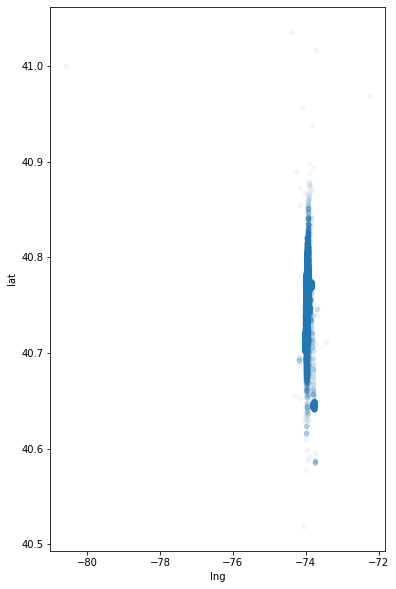

In [ ]:
df.plot.scatter(x='lng', y='lat', figsize=(6,10), alpha=0.05)

#### `h3_to_geo_boundary()`

\We can see how many passengers fall into each H3 hexagon. 
Aggregation of the passengers

In [ ]:
dfh3 = dfh3.drop(columns=['lng', 'lat']).groupby('h3_10').sum()

We can now add a H3 hexagonal geometry to each row

---



In [ ]:
gdfh3 = dfh3.h3.h3_to_geo_boundary()
gdfh3.head()

,passenger_count,geometry
h3_10,,
8a2a10010067fff,1,"POLYGON ((-73.85388 40.87385, -73.85479 40.873..."
8a2a100124b7fff,1,"POLYGON ((-73.90278 40.87825, -73.90370 40.878..."
8a2a1001259ffff,1,"POLYGON ((-73.90158 40.87904, -73.90250 40.878..."
8a2a1001531ffff,2,"POLYGON ((-73.82403 40.87046, -73.82494 40.870..."
8a2a10018c8ffff,1,"POLYGON ((-73.84667 40.82715, -73.84758 40.827..."


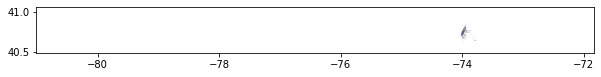

In [ ]:
gdfh3.plot(column='passenger_count', figsize=(10, 10))

#### `h3_to_parent`

If we want to perform the analysis on a coarser resolution, we can use `h3_to_parent`

In [ ]:
gdfh3_9 = gdfh3.h3.h3_to_parent(9)
gdfh3_9.head()

,passenger_count,geometry,h3_09
h3_10,,,
8a2a10089007fff,17,"POLYGON ((-73.95877 40.78037, -73.95969 40.780...",892a1008903ffff
8a2a1008900ffff,110,"POLYGON ((-73.95843 40.77924, -73.95934 40.779...",892a1008903ffff
8a2a10089017fff,9,"POLYGON ((-73.96032 40.78070, -73.96123 40.780...",892a1008903ffff
8a2a1008901ffff,97,"POLYGON ((-73.95997 40.77958, -73.96088 40.779...",892a1008903ffff
8a2a1008902ffff,117,"POLYGON ((-73.95723 40.78003, -73.95814 40.779...",892a1008903ffff


In [ ]:
gdfh3_9 = gdfh3_9.set_index('h3_09').groupby('h3_09').sum().h3.h3_to_geo_boundary()
gdfh3_9.head()

,passenger_count,geometry
h3_09,,
892a1008903ffff,350,"POLYGON ((-73.95912 40.78149, -73.96123 40.780..."
892a1008907ffff,611,"POLYGON ((-73.95688 40.77891, -73.95899 40.777..."
892a100890bffff,286,"POLYGON ((-73.96340 40.78138, -73.96551 40.780..."
892a100890fffff,686,"POLYGON ((-73.96116 40.77879, -73.96327 40.777..."
892a1008917ffff,544,"POLYGON ((-73.95485 40.78160, -73.95695 40.780..."


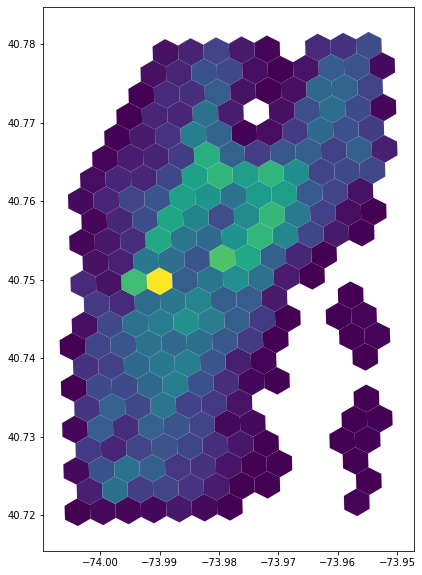

In [ ]:
gdfh3_9.plot(column='passenger_count', figsize=(10, 10))

## H3-Pandas Extended API: The same workflow, streamlined

In [ ]:
gdfh3_9_alt = df.h3.geo_to_h3_aggregate(10, return_geometry=False).h3.h3_to_parent_aggregate(9)

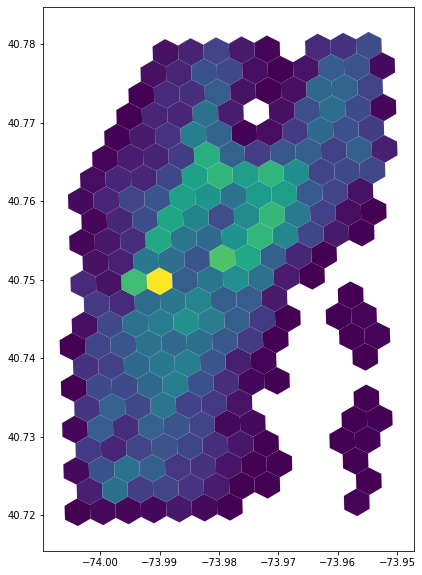

In [ ]:
gdfh3_9_alt.plot(column='passenger_count', figsize=(10, 10))